In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate
from datetime import datetime


In [45]:
#We obtained the data from https://www.nasdaq.com/market-activity/stocks/screener?page=1&rows_per_page=25 and combined each 3 stock exchange market sheets in one excel file called Exchanges.
exchange_file = pd.ExcelFile(r"c:\Users\Lenovo\Desktop\FinanceProject_TEST\computational-finance\Datasets\Exchanges.xlsx")
sheet_names = exchange_file.sheet_names
print("Sheet Names: ", sheet_names)

Sheet Names:  ['AMEX', 'Nasdaq', 'NYSE']


In [46]:
#Read each sheet and form a DataFrame. Also create a reference column.
data = []

for exchange in sheet_names:
    file = pd.read_excel(exchange_file, sheet_name=exchange)
    #Create a reference column
    file["Exchange"] = exchange
    data.append(file)

exchange_markets = pd.concat(data)
exchange_markets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6989 entries, 0 to 2779
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6988 non-null   object 
 1   Name        6989 non-null   object 
 2   Last Sale   6989 non-null   object 
 3   Net Change  6989 non-null   int64  
 4   % Change    6988 non-null   float64
 5   Market Cap  6589 non-null   float64
 6   Country     6716 non-null   object 
 7   IPO Year    3923 non-null   float64
 8   Volume      6989 non-null   int64  
 9   Sector      6456 non-null   object 
 10  Industry    6455 non-null   object 
 11  Exchange    6989 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 709.8+ KB


SECTOR AND MARKET CAPITALIZATION (AMEX + NASDAQ + NYSE)

In [47]:
#Write Market Cap Column in Trillion
exchange_markets["market_cap_trillion"] = exchange_markets["Market Cap"].div(1e12)
#Group data by Sector
exchange_by_sectors = exchange_markets.groupby("Sector")
#Calculate Average of Market Cap and sort decreasing order
mcap_by_sector = exchange_by_sectors.market_cap_trillion.mean().sort_values(ascending=False)
#Convert data to DataFrame and Rename columns
mcap_by_sector_df = mcap_by_sector.reset_index().rename(columns={"market_cap_trillion":"Average Market Capitalization (in Trillion)"})
#Add dolar sign and unit to Market Cap column
mcap_by_sector_df["Average Market Capitalization (in Trillion)"] = mcap_by_sector_df["Average Market Capitalization (in Trillion)"].apply(lambda x: "${:,.2f}T".format(x))
#Print the result in table format
print(tabulate(mcap_by_sector_df, headers="keys",tablefmt="simple_grid",stralign="right",showindex=False))

┌────────────────────────┬───────────────────────────────────────────────┐
│                 Sector │   Average Market Capitalization (in Trillion) │
├────────────────────────┼───────────────────────────────────────────────┤
│             Technology │                                        $3.29T │
├────────────────────────┼───────────────────────────────────────────────┤
│     Telecommunications │                                        $1.97T │
├────────────────────────┼───────────────────────────────────────────────┤
│                 Energy │                                        $1.49T │
├────────────────────────┼───────────────────────────────────────────────┤
│       Consumer Staples │                                        $1.33T │
├────────────────────────┼───────────────────────────────────────────────┤
│              Utilities │                                        $1.32T │
├────────────────────────┼───────────────────────────────────────────────┤
│ Consumer Discretionary 

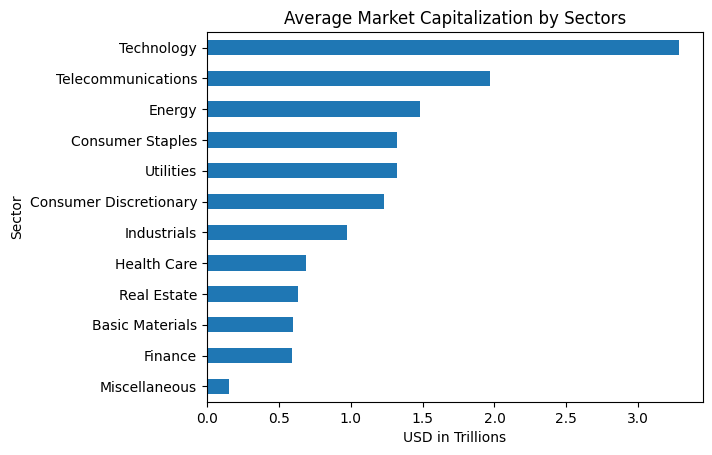

In [123]:
#Visualization as a Bar Chart
mcap_by_sector.sort_values().plot(kind="barh", title="Average Market Capitalization by Sectors")
plt.xlabel("USD in Trillions");plt.show();plt.close()

In [158]:
#All statistics
exchange_markets["Market Cap"].div(1e9).describe(percentiles=np.arange(.1,.91,.1))

count      6589.000000
mean       1178.856617
std        9275.600254
min           0.000000
10%           0.042575
20%           1.496125
30%           6.571904
40%          19.769640
50%          46.826140
60%         104.093066
70%         222.731183
80%         516.276563
90%        1624.153456
max      346335.036723
Name: Market Cap, dtype: float64

**FOR AMEX**

In [92]:
#Extract AMEX from data exchange_markets
slice_amex = exchange_markets["Exchange"] == "AMEX"
amex = exchange_markets[slice_amex]
amex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               299 non-null    object 
 1   Name                 299 non-null    object 
 2   Last Sale            299 non-null    object 
 3   Net Change           299 non-null    int64  
 4   % Change             299 non-null    float64
 5   Market Cap           280 non-null    float64
 6   Country              221 non-null    object 
 7   IPO Year             189 non-null    float64
 8   Volume               299 non-null    int64  
 9   Sector               271 non-null    object 
 10  Industry             271 non-null    object 
 11  Exchange             299 non-null    object 
 12  market_cap_trillion  280 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 32.7+ KB


SECTOR AND MARKET CAP. FOR AMEX

In [122]:
#Convert Market Cap to billions
amex["market_cap_billions"] = amex["Market Cap"].div(1e9)
#Group AMEX by Sector
amex_by_sector = amex.groupby("Sector")
#Calculate Average of Market Cap and sort decreasing order
mcap_amex_sector = amex_by_sector["market_cap_billions"].mean().sort_values(ascending=False)
mcap_amex_sector
#Convert to DataFrame and rename columns
mcap_amex_sector_df = mcap_amex_sector.reset_index().rename(columns={"market_cap_billions":"Market Cap. (In Billions)"})
#Add Dollar and unit
mcap_amex_sector_df["Market Cap. (In Billions)"] = mcap_amex_sector_df["Market Cap. (In Billions)"].apply(lambda x: "${:,.5}B".format(x))
#Plot Table
print(tabulate(mcap_amex_sector_df, headers="keys",stralign ="right",tablefmt="simple_grid"))

┌────┬────────────────────────┬─────────────────────────────┐
│    │                 Sector │   Market Cap. (In Billions) │
├────┼────────────────────────┼─────────────────────────────┤
│  0 │                 Energy │                    $297.37B │
├────┼────────────────────────┼─────────────────────────────┤
│  1 │        Basic Materials │                    $65.212B │
├────┼────────────────────────┼─────────────────────────────┤
│  2 │            Industrials │                    $47.574B │
├────┼────────────────────────┼─────────────────────────────┤
│  3 │            Real Estate │                    $42.085B │
├────┼────────────────────────┼─────────────────────────────┤
│  4 │                Finance │                    $33.651B │
├────┼────────────────────────┼─────────────────────────────┤
│  5 │            Health Care │                    $13.811B │
├────┼────────────────────────┼─────────────────────────────┤
│  6 │ Consumer Discretionary │                    $13.637B │
├────┼──

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24416\1880597979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amex["market_cap_billions"] = amex["Market Cap"].div(1e9)


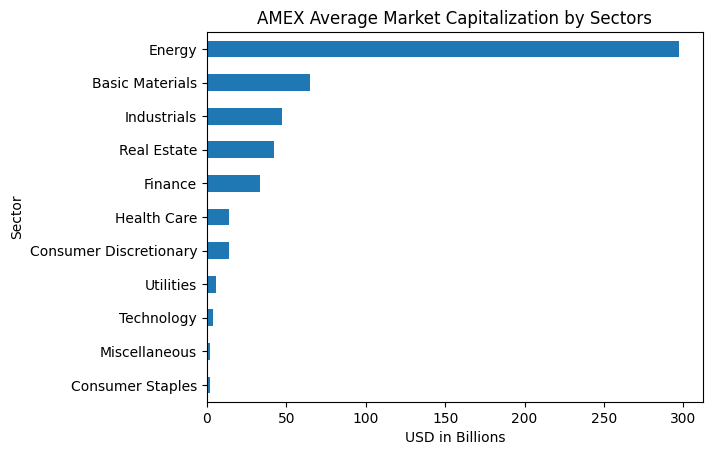

In [129]:
mcap_amex_sector.sort_values().plot(kind="barh",title="AMEX Average Market Capitalization by Sectors")
plt.xlabel("USD in Billions"); plt.show();plt.close()

**How many observations per sector?**


AMEX has 11 different sector.
┌────┬────────────────────────┬─────────┐
│    │ Sector                 │   count │
├────┼────────────────────────┼─────────┤
│  0 │ Finance                │      56 │
├────┼────────────────────────┼─────────┤
│  1 │ Health Care            │      45 │
├────┼────────────────────────┼─────────┤
│  2 │ Basic Materials        │      42 │
├────┼────────────────────────┼─────────┤
│  3 │ Consumer Discretionary │      35 │
├────┼────────────────────────┼─────────┤
│  4 │ Industrials            │      25 │
├────┼────────────────────────┼─────────┤
│  5 │ Energy                 │      21 │
├────┼────────────────────────┼─────────┤
│  6 │ Real Estate            │      18 │
├────┼────────────────────────┼─────────┤
│  7 │ Technology             │      15 │
├────┼────────────────────────┼─────────┤
│  8 │ Consumer Staples       │       9 │
├────┼────────────────────────┼─────────┤
│  9 │ Utilities              │       3 │
├────┼────────────────────────┼─────────┤
│ 10

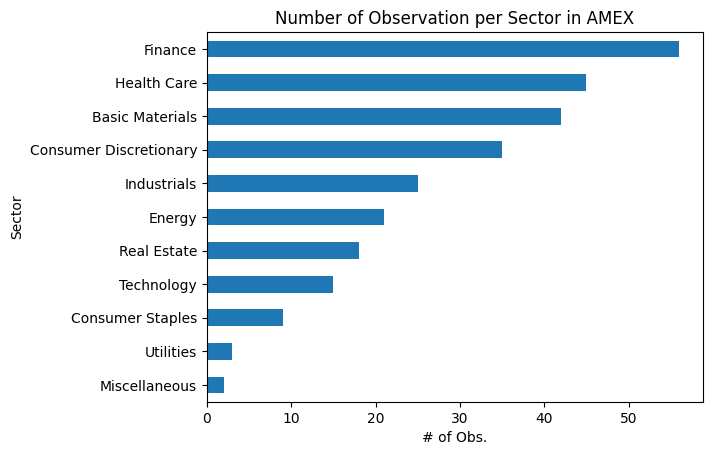

In [146]:
num_sec = amex["Sector"].nunique()
print("AMEX has",num_sec,"different sector.")
print(tabulate(amex['Sector'].value_counts().reset_index(), headers="keys",tablefmt="simple_grid"))
amex["Sector"].value_counts().sort_values().plot(kind="barh",title="Number of Observation per Sector in AMEX")
plt.xlabel("# of Obs.")
plt.show()
plt.close()


Industry and Market Cap. For AMEX+NASDAQ+NYSE

┌────────────────────────────────────────────────┬────────────────────────────────────┐
│                                       Industry │   Average Market Cap.(In Trillion) │
├────────────────────────────────────────────────┼────────────────────────────────────┤
│                         Computer Manufacturing │                             $42.36 │
├────────────────────────────────────────────────┼────────────────────────────────────┤
│             Department/Specialty Retail Stores │                              $7.51 │
├────────────────────────────────────────────────┼────────────────────────────────────┤
│ Computer Software: Programming Data Processing │                              $7.47 │
├────────────────────────────────────────────────┼────────────────────────────────────┤
│              Consumer Electronics/Video Chains │                              $6.57 │
├────────────────────────────────────────────────┼────────────────────────────────────┤
│                       Integrat

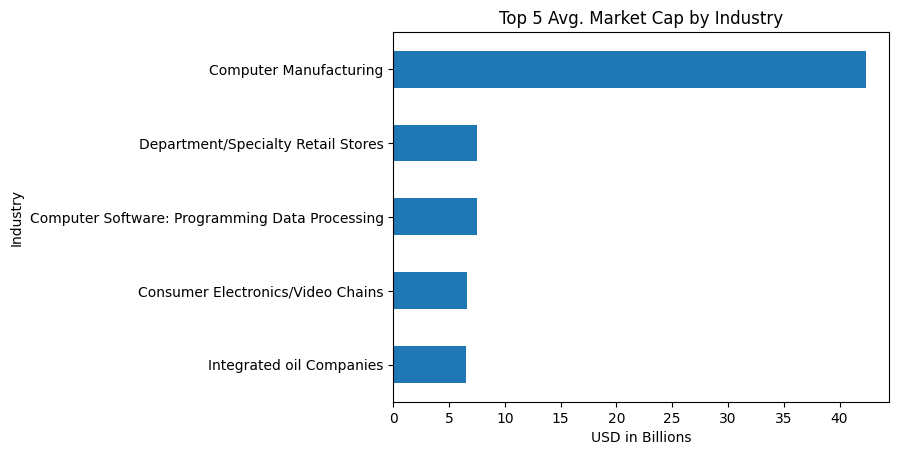

In [35]:
#Group the data by Industry and Market Cap
exchange_by_industry = exchange_markets.groupby("Industry")
mcap_by_industry = exchange_by_industry.market_cap_trillion.mean().sort_values(ascending=False)
mcap_by_industry_df = mcap_by_industry.reset_index().rename(columns={"market_cap_trillion":"Average Market Cap.(In Trillion)"})
mcap_by_industry_df["Average Market Cap.(In Trillion)"] = mcap_by_industry_df["Average Market Cap.(In Trillion)"].apply(lambda x: "${:,.2f}".format(x))

print(tabulate(mcap_by_industry_df[0:6], headers="keys", tablefmt="simple_grid", stralign="right",showindex=False))


mcap_by_industry.iloc[0:5].sort_values().plot(kind="barh", title="Top 5 Avg. Market Cap by Industry")
plt.xlabel("USD in Billions"); plt.show();plt.close()

More ways to aggregate data

**FOR NASDAQ**

In [36]:
nasdaq = pd.read_excel(exchange_file, sheet_name= sheet_names[1])
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      3909 non-null   object 
 1   Name        3910 non-null   object 
 2   Last Sale   3910 non-null   object 
 3   Net Change  3910 non-null   int64  
 4   % Change    3910 non-null   float64
 5   Market Cap  3910 non-null   int64  
 6   Country     3909 non-null   object 
 7   IPO Year    2273 non-null   float64
 8   Volume      3910 non-null   int64  
 9   Sector      3821 non-null   object 
 10  Industry    3820 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 336.1+ KB


In [160]:
nasdaq["market_cap_billions"] = nasdaq["Market Cap"].div(1e9)
by_sector = nasdaq.groupby("Sector")
sector_size_mean = by_sector.market_cap_billions.agg(["size", "mean"]).sort_values("size",ascending=False)
sector_size_mean.rename(columns={"size":"Size", "mean":"Average Market Cap"})


,size,mean
Sector,,
Health Care,1041,225.163558
Finance,823,197.928196
Consumer Discretionary,671,883.955086
Technology,583,3541.930900
Industrials,280,414.693834
Real Estate,92,391.572597
Consumer Staples,89,701.620462
Telecommunications,66,1242.740004
Energy,53,287.823163


In [38]:
#Different statistics by column
x = by_sector.agg({"market_cap_billions":"mean","IPO Year":"median" }) 

x.rename(columns={"market_cap_billions":"Avg. Market Cap.","IPO Year":"IPO Year Median"})

,Avg. Market Cap.,IPO Year Median
Sector,,
Basic Materials,54.111402,2019.5
Consumer Discretionary,883.955086,2019.0
Consumer Staples,701.620462,2020.0
Energy,287.823163,2017.0
Finance,197.928196,2021.0
Health Care,225.163558,2019.0
Industrials,414.693834,2019.0
Miscellaneous,56.146457,2021.0
Real Estate,391.572597,2019.0


Text(0.5, 1.0, 'The Number of Observations per Sector')

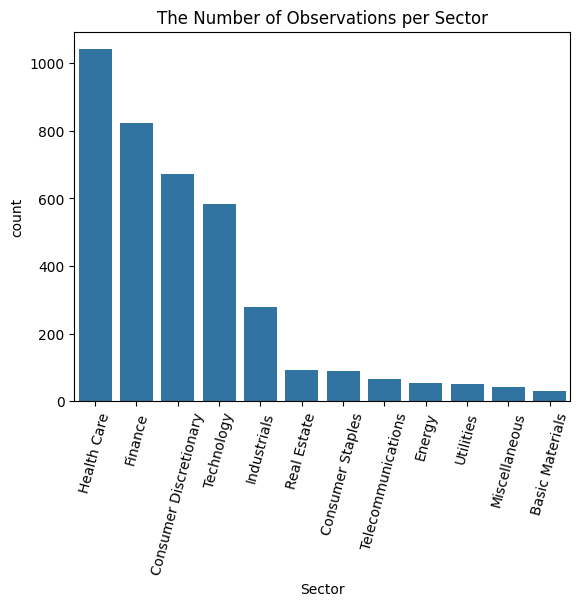

In [159]:
size = nasdaq.groupby("Sector").size()
order = size.sort_values(ascending=False)
order = order.index.tolist()
sns.countplot(x="Sector",data=nasdaq, order=order)
plt.xticks(rotation=75)
plt.title("The Number of Observations per Sector")

In [39]:
#Aggregate by two categories
sector_country_year = nasdaq.groupby(["Country","Sector","IPO Year"])
marketcap_mean = sector_country_year.market_cap_billions.mean()
marketcap_mean

Country        Sector                  IPO Year
Argentina      Consumer Discretionary  2007.0      10467.550721
               Finance                 1997.0         54.416680
Australia      Basic Materials         2024.0          2.443977
               Consumer Discretionary  2023.0         17.077050
               Consumer Staples        2024.0          0.000000
                                                       ...     
United States  Utilities               2019.0        100.886214
                                       2021.0         68.718820
                                       2022.0          1.386622
                                       2024.0         45.161367
Uruguay        Consumer Discretionary  2021.0        235.905357
Name: market_cap_billions, Length: 552, dtype: float64

In [40]:
#to get United States data
marketcap_mean.loc["United States"]

Sector                  IPO Year
Basic Materials         1986.0      144.063291
                        1993.0      799.677688
                        2018.0        3.020786
                        2023.0        3.930391
Consumer Discretionary  1981.0      102.907642
                                       ...    
Utilities               2016.0       30.513937
                        2019.0      100.886214
                        2021.0       68.718820
                        2022.0        1.386622
                        2024.0       45.161367
Name: market_cap_billions, Length: 269, dtype: float64

In [41]:
marketcap_mean.loc["United States"]["Finance"]

IPO Year
1981.0     899.897928
1983.0      42.946417
1986.0    1240.682423
1987.0     170.481510
1989.0      66.469770
1991.0      66.912200
1992.0     368.717128
1993.0     254.031760
1995.0      51.340972
1997.0     449.277283
1998.0      96.772919
1999.0      38.959491
2001.0    1993.704211
2002.0    2017.983568
2003.0     114.466834
2004.0     453.593960
2005.0     179.314046
2006.0      13.562311
2007.0      89.893292
2008.0      25.696209
2009.0      88.525953
2010.0     367.965031
2011.0      42.649735
2012.0     294.287673
2013.0     126.033852
2014.0      62.263124
2015.0     102.715533
2016.0     131.264289
2017.0     140.658327
2018.0      92.451377
2019.0     299.640111
2020.0     641.349734
2021.0      68.092176
2022.0      34.410175
2023.0       8.550845
2024.0      12.768011
Name: market_cap_billions, dtype: float64